In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [14]:
data_folder = "../../data/william/dataset3"

In [15]:
fig_folder = "../../fig/william/"

In [16]:
f_name = f'{data_folder}/preprocessed_data__no_decimate.csv'

In [17]:
data = pd.read_csv(f_name, index_col=0)
data

,position,label,0,1,2,3,4,5,6,7,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,on,BTHS1,-0.095253,-0.172939,-0.184780,-0.216405,-0.235202,-0.246320,-0.252569,-0.252569,...,0.828751,0.821400,0.818325,0.814993,0.805217,0.768218,0.727598,0.717087,0.691896,0.641615
1,on,BTHS1,-0.130617,-0.202185,-0.247384,-0.254526,-0.262959,-0.273785,-0.273785,-0.298349,...,0.952430,0.917968,0.917749,0.907917,0.906636,0.904293,0.903777,0.897176,0.894135,0.695316
2,on,BTHS1,-0.511905,-0.512131,-0.528608,-0.550849,-0.558334,-0.564145,-0.577289,-0.586380,...,0.850907,0.850907,0.850907,0.846735,0.843122,0.782642,0.767102,0.738285,0.716991,0.653960
3,on,BTHS1,-0.513879,-0.551237,-0.612775,-0.647124,-0.664897,-0.674957,-0.692627,-0.694541,...,0.794030,0.794030,0.793848,0.774992,0.774992,0.764174,0.737371,0.644471,0.643472,0.618766
4,on,BTHS1,-0.231654,-0.237479,-0.325915,-0.346533,-0.349481,-0.354920,-0.356282,-0.360064,...,1.060634,1.056419,1.048454,1.044072,1.008110,0.990643,0.988935,0.988935,0.972371,0.853465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,off,KR2,-0.181549,-0.188797,-0.201346,-0.240373,-0.246503,-0.258807,-0.316270,-0.316270,...,0.308828,0.308828,0.298006,0.279090,0.276824,0.276824,0.263073,0.203191,0.196183,0.171945
1090,off,KR2,0.000000,0.120020,0.123220,0.174786,0.174786,0.174786,0.195535,0.208535,...,-0.373518,-0.372853,-0.345638,-0.329568,-0.313948,-0.313699,-0.268316,-0.267956,-0.220839,-0.185189
1091,off,KR2,0.000000,0.000000,0.000000,0.000000,0.002605,0.077444,0.082351,0.092036,...,-0.580734,-0.577903,-0.563304,-0.561105,-0.561105,-0.548806,-0.521255,-0.521255,-0.517450,-0.419204
1092,off,KR2,0.000000,0.000000,0.077754,0.132216,0.133113,0.150192,0.157258,0.160288,...,-0.448845,-0.447989,-0.447185,-0.438000,-0.388235,-0.387828,-0.381227,-0.368872,-0.357539,-0.330238


In [18]:
def remove_axis_decorations(axes):

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

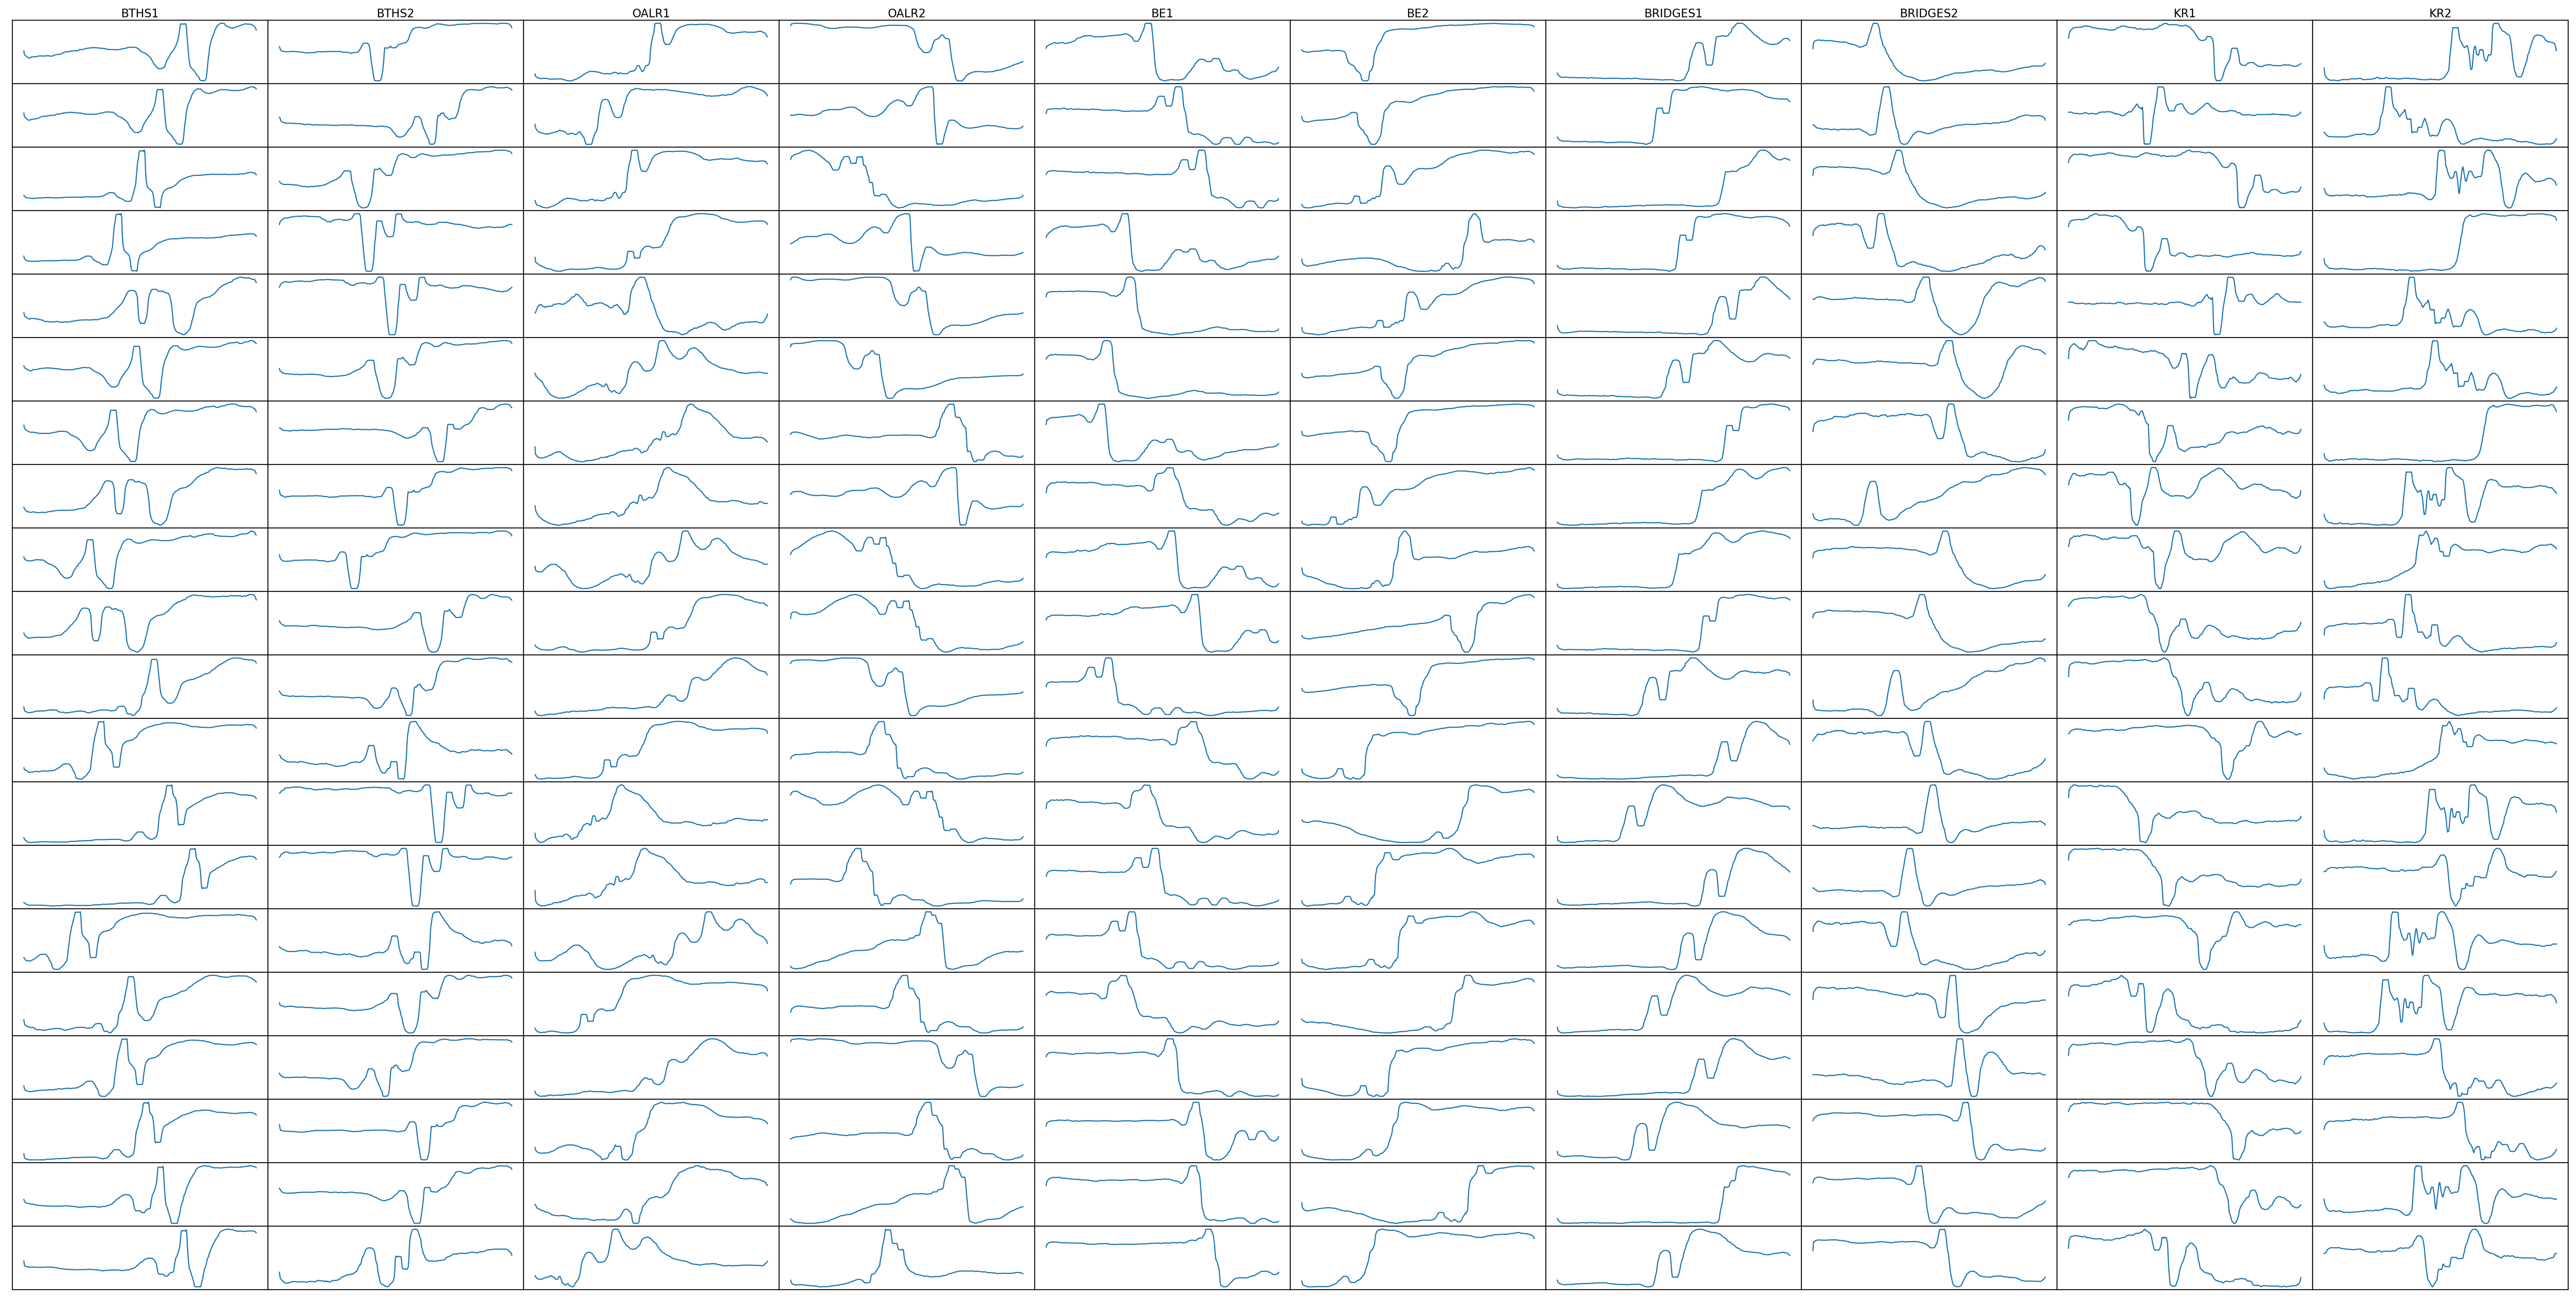

In [19]:
labels = list(data.label.unique())
n_trial_fig = 20

# Figure 1 -----------------------------------------

fig, axes = plt.subplots(
    figsize=(40, 20),
    nrows=n_trial_fig,
    ncols=len(labels))

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(n_trial_fig):

        ax = axes[i, column]

        x = data[data.label==label].iloc[i, 2:].values.astype(np.float64)
        x = signal.decimate(x, 5)

        ax.plot(x, lw=1.0)

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
    
plt.savefig(f"{fig_folder}/mosaic.pdf", bbox_inches='tight')